In [21]:
import pandas as pd
import numpy as np
from ipywidgets import *
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import game_finder as gf
import warnings
warnings.filterwarnings('ignore')
import re


%matplotlib inline

In [22]:
game_recommender = gf.get_games
scores = gf.turn_to_percent
game_list = gf.all_games
game_list = list(game_list['name'].apply(lambda x : x.lower()))
user_search_list = []

In [23]:
for games in game_list:
    games = str(games.lower())
    user_search_list.append(games)

In [24]:
user_choice = widgets.Text(continuous_update = False, description='Game:')

<h1>GameTraders INC would like to help you find a new game to play. Whats the last game you enjoyed playing?</h1>

In [60]:
display(user_choice)

Text(value='Dark Souls', continuous_update=False, description='Game:')

Button(description='Submit', style=ButtonStyle())

Output()

Looks like that exact game title could not be found. Will one of these work?


,name,Percent
315,DARK SOULS 2,90
2388,Tales of Zestiria,87
771,Dragon's Dogma: Dark Arisen,87
79,DRAGON BALL Z: KAKAROT,85
957,Fable Anniversary,83


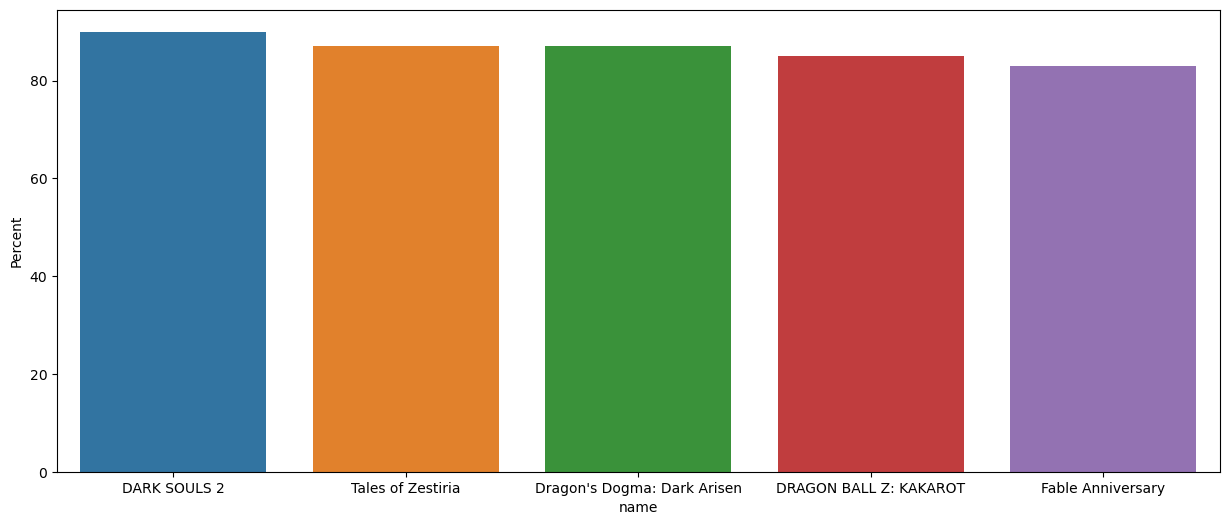

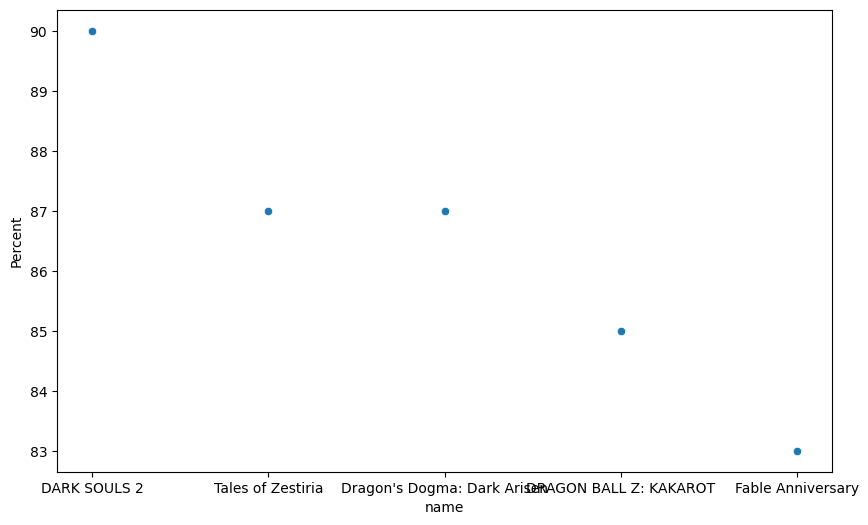

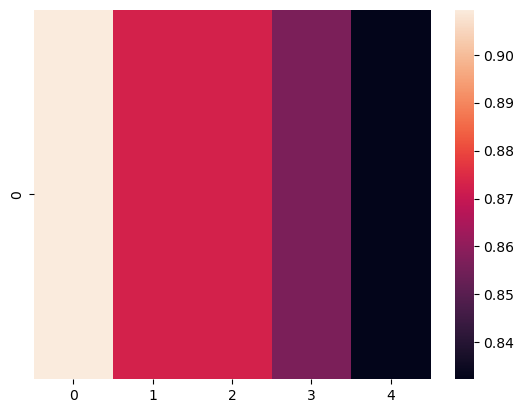

In [61]:
output = widgets.Output()
submit_button = widgets.Button(description = "Submit")
display(submit_button)

@output.capture(clear_output=True,wait=True,)
def on_button_clicked(b):
    
    pattern = re.compile(user_choice.value.lower())
    matches = [game for game in user_search_list if pattern.match(game)]
    
        
    if(len(matches) <= 1):
        
        if(user_choice.value.lower() in game_list ):
            df = pd.DataFrame(game_recommender(user_choice.value.lower()))
            sim_scores = scores(user_choice.value.lower())
            df['Percent'] = scores(user_choice.value.lower())
            df['Percent'] = df['Percent'].apply(lambda x: x*100)
            df['Percent'] = df['Percent'].apply(lambda x: int(x))
    
            sim_matrix = np.matrix(sim_scores)
    
    
            print('Here are the recommended titles for you!')
    
            display(df)
    
    
            plt.figure(figsize=(15,6)) 
            sns.barplot(x = 'name', y = 'Percent',data = df) 
            plt.show()
    
            plt.figure(figsize=(10,6)) 
            sns.scatterplot(x = 'name', y = 'Percent',data = df) 
            plt.show()
    
            sns.heatmap(sim_matrix)
        
        else:
            print('Sorry your game could not be found. Please try again!')
        
    else:
        game_picker = widgets.Dropdown(options = matches)
        display(game_picker)
        print(game_picker.value)
        
        def game_picker_call(g):
            user_choice = game_picker.value.lower()
            
            df = pd.DataFrame(game_recommender(user_choice))
            sim_scores = scores(user_choice)
            df['Percent'] = scores(user_choice)
            df['Percent'] = df['Percent'].apply(lambda x: x*100)
            df['Percent'] = df['Percent'].apply(lambda x: int(x))
    
            sim_matrix = np.matrix(sim_scores)
    
    
            print('Looks like that exact game title could not be found. Will one of these work?')
    
            display(df)
    
    
            plt.figure(figsize=(15,6)) 
            sns.barplot(x = 'name', y = 'Percent',data = df) 
            plt.show()
    
            plt.figure(figsize=(10,6)) 
            sns.scatterplot(x = 'name', y = 'Percent',data = df) 
            plt.show()
    
            sns.heatmap(sim_matrix)
        
        submit_button.on_click(game_picker_call)
        
         
    

submit_button.on_click(on_button_clicked)

output

In [33]:
pattern = re.compile(user_choice.value.lower())
matches = [game for game in user_search_list if pattern.match(game)]
print(matches)

['resident evil 4', 'resident evil 4 (2005)', 'resident evil 4 chainsaw demo']
